# Определение перспективного тарифа для телеком компании

Я аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Мне предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В моем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

# Описание тарифов

Тариф «Смарт»

1 Ежемесячная плата: 550 рублей

2 Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика

3 Стоимость услуг сверх тарифного пакета:
- минута разговора: 3 рубля
- сообщение: 3 рубля
- 1 Гб интернет-трафика: 200 рублей

Тариф «Ультра»

1 Ежемесячная плата: 1950 рублей

2 Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика

3 Стоимость услуг сверх тарифного пакета:
- минута разговора: 1 рубль
- сообщение: 1 рубль
- 1 Гб интернет-трафика: 150 рублей

# План исследования

1. Осмотр и изучение общей информации о данных, нахождение артефактов и аномалий

2. Подготовка данных.
- Приведение данных к нужным типам;
- Нахождение и исправление ошибок в данных.
- Подсчет для каждого пользователя:
a) количества сделанных звонков и израсходованных минут разговора по месяцам;
b) количества отправленных сообщений по месяцам;
c) объема израсходованного интернет-трафика по месяцам;
d) помесячной выручки с каждого пользователя 

3. Анализ данных. Описать поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитать среднее количество, дисперсию и стандартное отклонение. Построить гистограммы. Описать распределения.

4. Проверить гипотезы.
- средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;

5. Общие выводы и рекомендации


# Описание данных
Таблица users (информация о пользователях):
- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tariff — название тарифного плана

Таблица calls (информация о звонках):
- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок

Таблица messages (информация о сообщениях):
- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение

Таблица internet (информация об интернет-сессиях):
- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя

Таблица tariffs (информация о тарифах):
- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

## Изучение данных

In [1]:
# импортируем библиотеки
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import math


# данных для проекта 
calls = pd.read_csv('https://code.s3.yandex.net/datasets/calls.csv')
internet = pd.read_csv('https://code.s3.yandex.net/datasets/internet.csv')
messages = pd.read_csv('https://code.s3.yandex.net/datasets/messages.csv')
tariffs = pd.read_csv('https://code.s3.yandex.net/datasets/tariffs.csv')
users = pd.read_csv('https://code.s3.yandex.net/datasets/users.csv')


pd.options.display.max_columns = 40
import warnings
warnings.filterwarnings('ignore')

Таблица Пользователи:

In [2]:
users.sample(20, random_state=1)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
304,1304,68,NaN,Владимир,Илья,Соловьёв,2018-11-05,ultra
340,1340,50,NaN,Пенза,Тимофей,Алютин,2018-01-30,smart
47,1047,67,NaN,Саратов,Милица,Меркулова,2018-10-29,smart
67,1067,45,NaN,Москва,Юзефа,Абашкина,2018-04-09,smart
479,1479,40,NaN,Хабаровск,Игорь,Богданов,2018-07-03,smart
485,1485,34,NaN,Киров,Таисия,Сухова,2018-12-29,ultra
310,1310,28,NaN,Уфа,Рудольф,Нестеров,2018-03-22,ultra
31,1031,66,NaN,Москва,Лаврентий,Тимофеев,2018-11-02,smart
249,1249,25,NaN,Курск,Изольда,Авдушева,2018-08-14,smart
90,1090,54,2018-12-03,Череповец,Екатерина,Астафьева,2018-10-11,ultra


In [3]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [4]:
users.describe()

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


Отмечаем, что в дальнейшем нужно будет преобразовать дату в правильный формат.

Таблица Звонки:

In [5]:
calls.sample(20, random_state=1)

,id,call_date,duration,user_id
26953,1066_374,2018-08-26,0.00,1066
66122,1168_1273,2018-03-28,16.05,1168
67325,1171_350,2018-09-14,6.23,1171
74643,1186_465,2018-09-02,0.79,1186
192311,1472_124,2018-05-04,5.94,1472
47375,1118_664,2018-10-24,13.41,1118
91143,1227_563,2018-08-03,15.15,1227
3818,1010_67,2018-08-16,14.29,1010
182822,1454_574,2018-09-23,9.98,1454
187346,1463_0,2018-12-05,10.63,1463


In [6]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [7]:
calls.describe()

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


Снова неправильный формат для даты, а также встречаются нулевые значения для длительности звонков. Как я понимаю, это непринятые и сброшенные звонки. Деньги за них как правило не берутся и минуты из бесплатных не списываются. Соответственно, пока оставим их, возможно, в дальнейшем, отсечем их как выбросы.

Таблица Сообщения:

In [8]:
messages.sample(20, random_state=1)

,id,message_date,user_id
45696,1197_26,2018-12-31,1197
66091,1282_523,2018-11-30,1282
18743,1082_184,2018-10-18,1082
33759,1146_557,2018-12-22,1146
11403,1048_49,2018-09-27,1048
97793,1401_125,2018-08-10,1401
406,1000_406,2018-12-29,1000
71393,1302_221,2018-10-23,1302
103004,1420_11,2018-12-12,1420
53795,1238_208,2018-10-08,1238


In [9]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [10]:
messages.describe()

,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


Та же неточность с форматом даты.

Таблица Интернет:

In [11]:
internet.sample(20, random_state=1)

,Unnamed: 0,id,mb_used,session_date,user_id
35745,35745,1124_125,122.45,2018-12-03,1124
18383,18383,1064_102,320.60,2018-12-19,1064
59774,59774,1203_22,605.96,2018-06-17,1203
56317,56317,1188_123,781.73,2018-05-08,1188
52231,52231,1176_386,150.98,2018-08-20,1176
20276,20276,1068_26,389.65,2018-12-04,1068
82748,82748,1281_64,841.89,2018-11-07,1281
129266,129266,1431_300,461.23,2018-11-26,1431
46783,46783,1160_75,0.00,2018-08-15,1160
48492,48492,1168_260,336.06,2018-07-28,1168


In [12]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [13]:
internet.describe()

,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


Таблица Тарифы:

In [14]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


В следующем разделе меняем форматы, а также округлим длительность звонка в таблице Звонки в большую сторону.

## Подготовка данных

Производим замену формата в столбцах с датами в таблице Users

In [15]:
users['churn_date'] = pd.to_datetime(users['churn_date'], format="%Y-%m-%d")
users['reg_date'] = pd.to_datetime(users['reg_date'], format="%Y-%m-%d")

In [16]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


Таблица Calls

In [17]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format="%Y-%m-%d")

Меняем формат на числовой в столбце с id

In [18]:
calls['id'] = calls['id'].astype('int')

Округляем длительность звонков в большую сторону

In [19]:
calls['duration'] = calls['duration'].apply(np.ceil).astype('int')

In [20]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null int64
call_date    202607 non-null datetime64[ns]
duration     202607 non-null int64
user_id      202607 non-null int64
dtypes: datetime64[ns](1), int64(3)
memory usage: 6.2 MB


То же самое для таблицы Messages

In [21]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format="%Y-%m-%d")

In [22]:
messages['id'] = messages['id'].astype('int')

In [23]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null int64
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[ns](1), int64(2)
memory usage: 2.8 MB


таблица Internet

In [24]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format="%Y-%m-%d")

In [25]:
internet['id'] = internet['id'].astype('int')

In [26]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null int64
mb_used         149396 non-null float64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 5.7 MB


Сгруппируем количество сделанных звонков и израсходованных минут разговора по месяцам.

In [27]:
calls['month'] = calls['call_date'].dt.month

In [28]:
сalls_by_month = calls.groupby(['user_id', 'month']).agg({'duration':'sum', 'id':'count'}).reset_index().rename(columns={'id':'calls_count'})

In [29]:
сalls_by_month.head()

,user_id,month,duration,calls_count
0,1000,5,159,22
1,1000,6,172,43
2,1000,7,340,47
3,1000,8,408,52
4,1000,9,466,58


Сгруппируем количество отправленных сообщений по месяцам

In [30]:
messages['month'] = messages['message_date'].dt.month

In [31]:
messages_by_month = messages.groupby(['user_id', 'month']).agg({'id':'count'}).reset_index().rename(columns={'id':'message_count'})

In [32]:
messages_by_month.head()

,user_id,month,message_count
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


Сгруппируем объем израсходованного интернет-трафика по месяцам

In [33]:
internet['month'] = internet['session_date'].dt.month

In [34]:
internet_by_month = internet.groupby(['user_id', 'month']).agg({'mb_used':'sum'}).reset_index()

In [35]:
internet_by_month.head()

,user_id,month,mb_used
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91


Для дальнейшего анализа соединим полученные таблицы в одну

In [36]:
df = сalls_by_month.merge(messages_by_month, on=['user_id','month'], how='outer')

In [37]:
df = df.merge(internet_by_month, on=['user_id','month'], how = 'outer')

In [38]:
df = df.merge(users, on='user_id', how='outer')

In [39]:
df.head()

,user_id,month,duration,calls_count,message_count,mb_used,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5.0,159.0,22.0,22.0,2253.49,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6.0,172.0,43.0,60.0,23233.77,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7.0,340.0,47.0,75.0,14003.64,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8.0,408.0,52.0,81.0,14055.93,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9.0,466.0,58.0,57.0,14568.91,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


In [40]:
tariffs = tariffs.rename(columns={'tariff_name':'tariff'})

In [41]:
df = df.merge(tariffs, on='tariff', how='left')

In [42]:
df.head()

,user_id,month,duration,calls_count,message_count,mb_used,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5.0,159.0,22.0,22.0,2253.49,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6.0,172.0,43.0,60.0,23233.77,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,7.0,340.0,47.0,75.0,14003.64,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,8.0,408.0,52.0,81.0,14055.93,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,9.0,466.0,58.0,57.0,14568.91,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1


Таблица с данными для анализа готова, исследуем ее и посмотрим на количество пропусков.

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 20 columns):
user_id                  3216 non-null int64
month                    3214 non-null float64
duration                 3174 non-null float64
calls_count              3174 non-null float64
message_count            2717 non-null float64
mb_used                  3203 non-null float64
age                      3216 non-null int64
churn_date               189 non-null datetime64[ns]
city                     3216 non-null object
first_name               3216 non-null object
last_name                3216 non-null object
reg_date                 3216 non-null datetime64[ns]
tariff                   3216 non-null object
messages_included        3216 non-null int64
mb_per_month_included    3216 non-null int64
minutes_included         3216 non-null int64
rub_monthly_fee          3216 non-null int64
rub_per_gb               3216 non-null int64
rub_per_message          3216 non-null int64
rub_per

In [44]:
pd.DataFrame(round((df.isna().mean()*100),2)).style.background_gradient('coolwarm')

,0
user_id,0
month,0.06
duration,1.31
calls_count,1.31
message_count,15.52
mb_used,0.4
age,0
churn_date,94.12
city,0
first_name,0


Для длительности звонков, количества звонков, трафика и смс выполним замену пропусков на 0

In [45]:
df['message_count'] = df['message_count'].fillna(0)
df['mb_used'] = df['mb_used'].fillna(0)
df['duration'] = df['duration'].fillna(0)
df['calls_count'] = df['calls_count'].fillna(0)

In [46]:
df.isna().sum()

user_id                     0
month                       2
duration                    0
calls_count                 0
message_count               0
mb_used                     0
age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff                      0
messages_included           0
mb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
dtype: int64

Добавим в таблицу помесячную выручку с каждого пользователя. Для этого подсчитаем выручку сверх абонентской платы, которую платили абоненты за месяц, и прибавим ее к абонентской плате. Для подсчета выручки сверх абонентской платы создадим функцию.

In [47]:
def revenue(row):
    sms = (row['message_count'] - row['messages_included']) * row['rub_per_message']
    mins = (row['duration'] - row['minutes_included']) * row['rub_per_minute']
    mbs = np.floor((row['mb_used'] - row['mb_per_month_included']) * row['rub_per_gb'] / 1024)
    total = 0
    for i in [sms, mins, mbs]:
        if i > 0:
            total += i
    return total

In [48]:
df['revenue'] = df.apply(lambda x: revenue(x), axis=1)

In [49]:
df['total_revenue'] = df['rub_monthly_fee'] + df['revenue']

In [50]:
df['total_revenue'].describe()

count    3216.000000
mean     1484.272699
std       782.797714
min       550.000000
25%       691.000000
50%      1557.500000
75%      1950.000000
max      6699.000000
Name: total_revenue, dtype: float64

In [51]:
df.head()

,user_id,month,duration,calls_count,message_count,mb_used,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,revenue,total_revenue
0,1000,5.0,159.0,22.0,22.0,2253.49,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,0.0,1950.0
1,1000,6.0,172.0,43.0,60.0,23233.77,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,0.0,1950.0
2,1000,7.0,340.0,47.0,75.0,14003.64,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,0.0,1950.0
3,1000,8.0,408.0,52.0,81.0,14055.93,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,0.0,1950.0
4,1000,9.0,466.0,58.0,57.0,14568.91,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,0.0,1950.0


In [52]:
df.describe()

,user_id,month,duration,calls_count,message_count,mb_used,age,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,revenue,total_revenue
count,3216.000000,3214.000000,3216.000000,3216.000000,3216.000000,3216.000000,3216.000000,3216.000000,3216.000000,3216.000000,3216.000000,3216.000000,3216.000000,3216.000000,3216.000000,3216.000000
mean,1251.588930,8.317362,450.964241,62.999689,38.257463,17196.911608,46.643968,341.262438,20069.253731,1266.480100,979.228856,184.670398,2.386816,2.386816,505.043843,1484.272699
std,144.645928,2.905413,242.096312,33.263185,36.149684,7580.754906,16.581233,438.092669,7083.266729,1152.875444,645.610249,23.057509,0.922300,0.922300,731.751977,782.797714
min,1000.000000,1.000000,0.000000,0.000000,0.000000,0.000000,18.000000,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000,0.000000,550.000000
25%,1125.000000,6.000000,282.000000,40.000000,9.000000,12478.765000,32.000000,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000,0.000000,691.000000
50%,1253.000000,9.000000,443.000000,62.000000,30.000000,16937.820000,46.000000,50.000000,15360.000000,500.000000,550.000000,200.000000,3.000000,3.000000,103.500000,1557.500000
75%,1378.250000,11.000000,589.000000,82.000000,57.000000,21422.375000,62.000000,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000,835.000000,1950.000000
max,1499.000000,12.000000,1673.000000,244.000000,224.000000,49745.690000,75.000000,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000,6149.000000,6699.000000


Данные готовы, приступаем к анализу.

##  Анализ данных

Построим графики распределения количества израсходованного трафика, смс, а также длительности звонков на каждом тарифе. Также для каждой из этих метрик создадим график близости к нормальному распределению. В каждом блоке графиков сначала будут идти графики для тарифа Smart, а затем для тарифа Ultra.

In [53]:
smart = df.query('tariff == "smart"')[['mb_used']].astype('int')
ultra = df.query('tariff == "ultra"')[['mb_used']].astype('int')

In [54]:
def my_bins(df,value):
    '''
    Сделаем функцию которая отобразит нужное количество корзин 
    '''    
    if df[value].max() > 100:
        return 50
    elif df[value].max() > 500:
        return  100
    elif df[value].max() > 1000:
        return  200
    else: return 20
    
def my_hist(df, col):
    
    coef_bins = 0.005
    X_1 = df.loc[(df[col] >= df[col].quantile(.01))&(df[col] <= df[col].quantile(.99)), col]
    plt.figure(figsize =(6, 4))
    hist = X_1.plot(
                kind='hist', 
                bins=my_bins(df, col), 
                alpha=0.5, 
                ec='black',
                color='green',
                )
    X_1.plot(kind='kde', color='g')
    plt.axvline(x=X_1.median(),
                linewidth=3, 
                color='red', 
                linestyle='--')
    plt.axvline(x=X_1.mean(),
                linewidth=3, 
                color='b', 
                linestyle=':')
    plt.axvline(x=X_1.quantile(.05),
                linewidth=3, 
                color='y', 
                linestyle='--')
    plt.axvline(x=X_1.quantile(.95),
                linewidth=3, 
                color='y', 
                linestyle='--')
    plt.xlim(df[col].quantile(.01), df[col].quantile(.99))
    plt.title('Распределение по столбцу ' + col)
    plt.xlabel('Значение')
    plt.ylabel('Частота')
    plt.grid()
    plt.show()
    plt.figure(figsize =(6, 4))
    X_1.plot(kind='kde', 
            alpha=0.5, 
            color='green',
            )
    plt.xlim(df[col].quantile(.01), df[col].quantile(.99))
    plt.title('Распределение по столбцу ' + col)
    plt.xlabel('Значение')
    plt.ylabel('Частота')
    plt.grid()
    plt.show()
    #Проверка на нормальность распределения;
    from statsmodels.graphics.gofplots import qqplot
    qqplot(df[col], line='s')
    plt.title('Близость к нормальному распределению (красная линия)',  fontsize=12, color='black')
    plt.show()
    print('--------------------------------------------------------------')

Исследуем израсходованный трафик на двух тарифах.

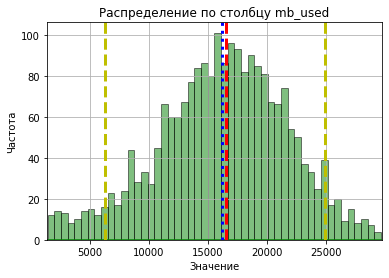

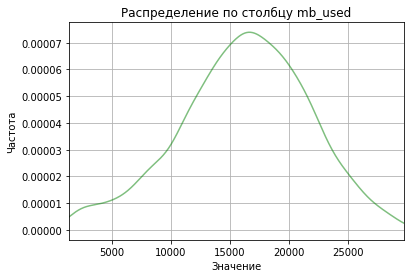

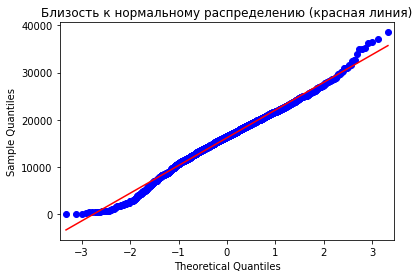

--------------------------------------------------------------


In [55]:
my_hist(smart,'mb_used')

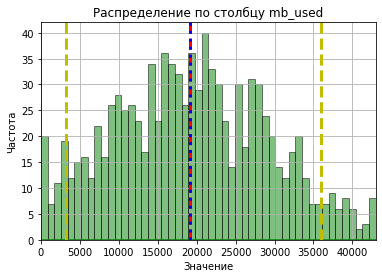

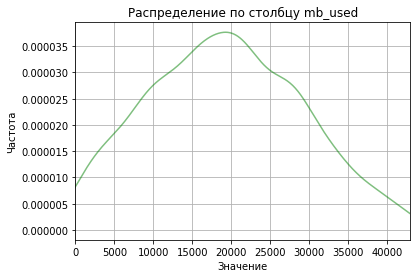

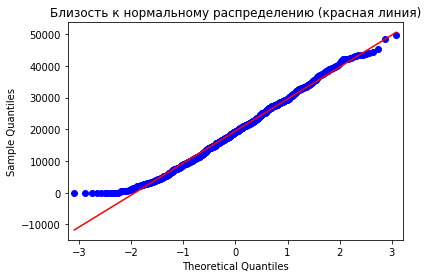

--------------------------------------------------------------


In [56]:
my_hist(ultra,'mb_used')

In [57]:
df.groupby('tariff')\
  .agg({'mb_used':['median','mean','var','std']})\
  .style.format("{:.2f}")

Как мы видим, и на одном и на другом тарифе распределение израсходанного трафика близко к нормальному. Медиана и среднее лежат рядом. Видно, что на тарифе Smart большинству абонентов не хватает 15 Гб трафика, входящего в тарифный план, тогда как большинство пользователей тарифа Ultra в месячный трафик вписываются с запасом. 

Исследуем длительность звонков

In [58]:
smart1 = df.query('tariff == "smart"')[['duration']].astype('int')
ultra1 = df.query('tariff == "ultra"')[['duration']].astype('int')

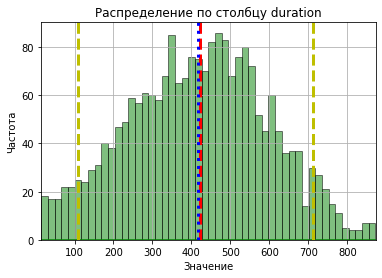

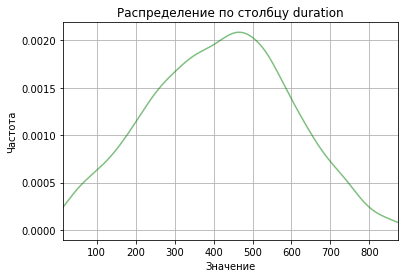

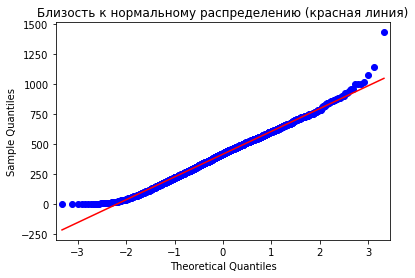

--------------------------------------------------------------


In [59]:
my_hist(smart1,'duration')

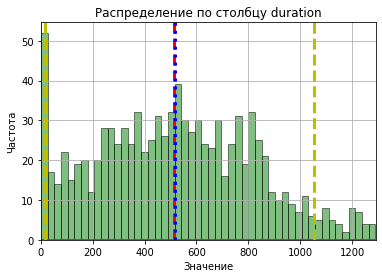

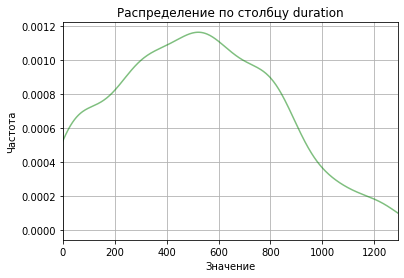

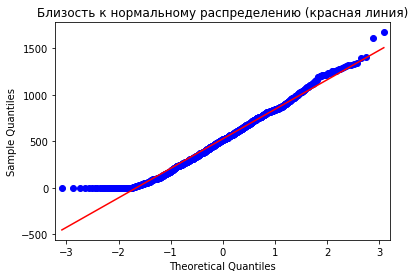

--------------------------------------------------------------


In [60]:
my_hist(ultra1,'duration')

In [61]:
df.groupby('tariff')\
  .agg({'duration':['median','mean','var','std']})\
  .style.format("{:.2f}")

Для длительности звонков распределение также близко к нормальному. Медиана и среднее лежат рядом. На тарифе Смарт среднее составляет 417.75 мин, а медиана - 421.5 мин. Это значит, что как правило, абоненты тарифа смарт почти полностью используют включенные в абонентскую плату 500 мин, а многие их перерасходуют. Абоненты тарифа Ультра имеют 3000 минут, что равносильно безлимиту, т.к. максимальная продолжительность звонков за месяц у одного абонента - 1673 мин.

In [62]:
smart2 = df.query('tariff == "smart"')[['message_count']].astype('int')
ultra2 = df.query('tariff == "ultra"')[['message_count']].astype('int')

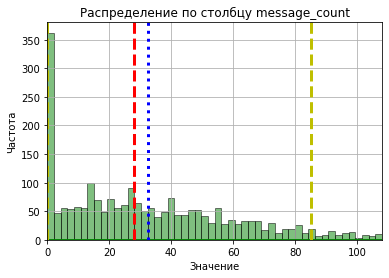

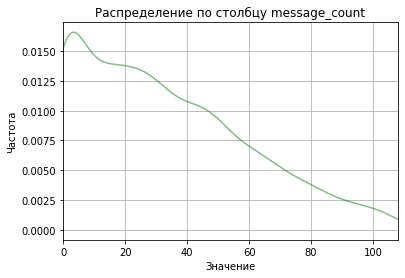

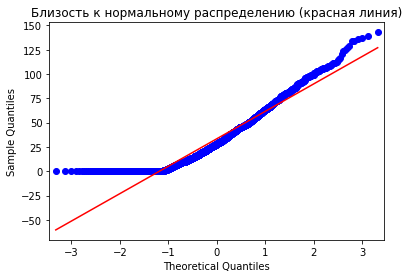

--------------------------------------------------------------


In [63]:
my_hist(smart2,'message_count')

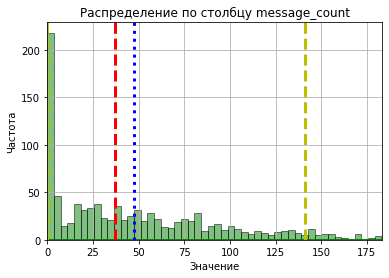

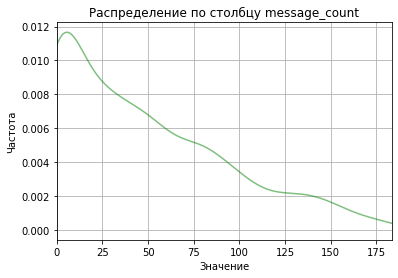

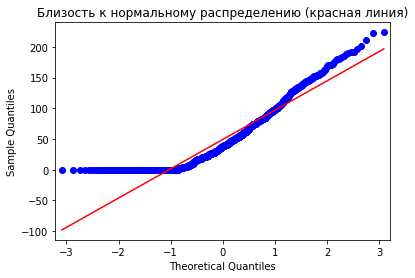

--------------------------------------------------------------


In [64]:
my_hist(ultra2,'message_count')

In [65]:
df.groupby('tariff')\
  .agg({'message_count':['median','mean','var','std']})\
  .style.format("{:.2f}")

Изучая данные за 2018 год, мы видим, что как на одном, так и на другом тарифе, смс не пользуются популятностью. Датасет скошен вправо, медиана значительно меньше среднего. На тарифе Ультра наблюдается большая дисперсия и стандартное отклонение, значит находятся абоненты, отправляющие большое количество смс, однако, и тариф Смарт возможно для них бы не подошел.  

Посмотрим, много ли абонентов платят сверх сумм своих абон. плат, и какие суммы они переплачивают

In [66]:
smart3 = df.query('tariff == "smart"')[['revenue']].astype('int')
ultra3 = df.query('tariff == "ultra"')[['revenue']].astype('int')

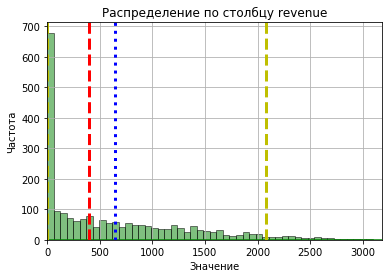

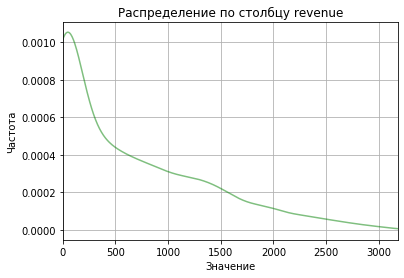

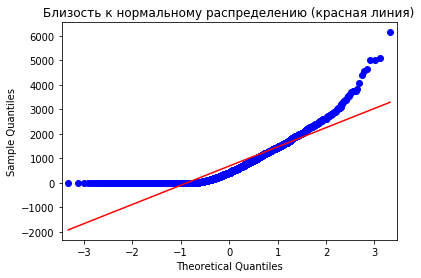

--------------------------------------------------------------


In [67]:
my_hist(smart3,'revenue')

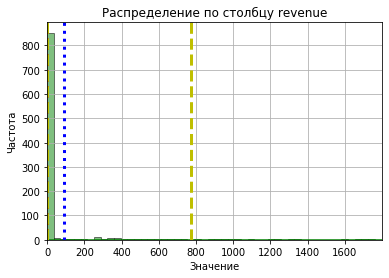

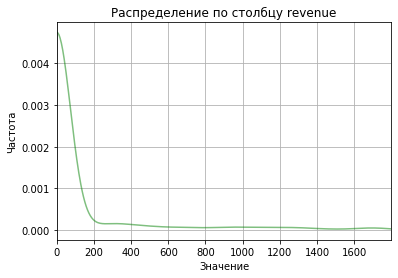

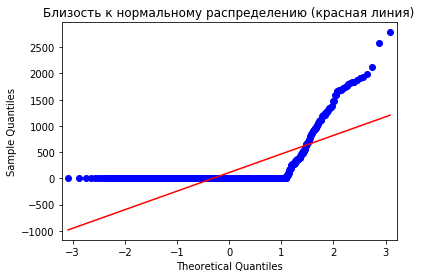

--------------------------------------------------------------


In [68]:
my_hist(ultra3,'revenue')

In [69]:
df.groupby('tariff')\
  .agg({'revenue':['median','mean','var','std']})\
  .style.format("{:.2f}")

Отмечаем, что для абонентов тарифа смарт свойственно платить больше, чем составляет абонентская плата. В среднем, абоненты данного тарифа переплачивают 680 рублей, однако разброс данных значительный. Те абоненты, кто много переплачивают, могут посмотреть другие тарифы, возможно, на них им будет выгодней. На тарифе ультра практически 100% абонентов не выходят за сумму абонентской платы. И, как мы уже поняли, возможно переплачивают, т.к. не используют полностью отведенное им количество минут, гигобайт и смс.

## Проверка гипотез.

Прежде чем приступать к проверке гипотез, избавимся от выбросов. Для столбца total_revenue отсечем данные до 01 квантиля и после 99 квантиля.

In [70]:
df = df.loc[(df['total_revenue'] >= df['total_revenue'].quantile(.01))&(
 df['total_revenue'] <= df['total_revenue'].quantile(.99))]

Для проверки гепотез я буду использовать t-критерий Стьюдента, т.к. сравниваемые выборки между собой независимы.

Гипотеза 1. Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.

Сформулируем гипотезы:

- H0: выручка пользователей тарифов «Ультра» и «Смарт» не различается
- H1: выручка пользователей тарифов «Ультра» и «Смарт» различается

In [71]:
smart_only = df[df['tariff'] == 'smart']
ultra_only = df[df['tariff'] == 'ultra']

In [72]:
smart_only_rev = smart_only['total_revenue']
ultra_only_rev = ultra_only['total_revenue']

In [73]:
alpha = 0.05

In [74]:
results = st.ttest_ind(smart_only_rev, ultra_only_rev)

In [75]:
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 6.115791262496582e-237
Отвергаем нулевую гипотезу


Вывод: разница в средних значениях не случайна, между выборками есть значимые различия 

Гипотеза 2. Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Сформулируем гипотезы:

- H0: средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов
- H1: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

In [76]:
df['region'] = np.where(df['city'] == 'Москва', 'Москва', 'Регион')

In [77]:
moscow = df[df['region'] == 'Москва']
regions = df[df['region'] == 'Регион']

In [78]:
moscow_rev = moscow['total_revenue']
regions_rev = regions['total_revenue']

In [79]:
results = st.ttest_ind(moscow_rev, regions_rev)

In [80]:
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.2157380515391143
Не получилось отвергнуть нулевую гипотезу


Вывод: с вероятностью в 21.5% такой результат может быть получен случайно. Значимых различий нет.

## Выводы и рекомендации

1. Выручка отличается для разных тарифов. 
2. Для жителей Москвы и других городов выручка не отличается, и там и там жители говорят и пользуются интернетом примерно одинаково.
3. Огромное количество неизрасходованных смс, минут и трафика для абонентов тарифа Ультра. Возможно, оператору необходимо подумать над оптимизацией данного тарифа, т.к. абоненты могут отказаться от него и перейти на более дешевый.
4. Возможно, стоит рассмотреть переход на посекундную тарификацию для конкурентного преимущества.